In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import pandas as pd
import time
from NEF_syn import *
from environments import *
from fit import *
from plot_spikes import *
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

### Carrabin

In [2]:
trial = 2
sid = 1
alpha = 2e-4
lambd = 1.0
z = 0
n_neurons = 200
dataset = 'carrabin'

empirical = pd.read_pickle(f"data/{dataset}.pkl").query("sid==@sid")
trials = empirical['trial'].unique() 
W = np.zeros((1, n_neurons))
for t in trials[:20]:
    print(f"training sid {sid}, trial {t}")
    env = EnvironmentCount(dataset, sid=sid, trial=t, lambd=lambd, iti_noise=0)
    net, sim, W = simulate_NEF_syn(W, env, alpha=alpha, n_neurons=n_neurons, z=z, seed_net=sid, train=True)
print(f"running sid {sid}, trial {trial}")
env = EnvironmentCount(dataset, sid=sid, trial=trial, lambd=lambd, iti_noise=0)
net, sim = simulate_NEF_syn(W, env, alpha=alpha, n_neurons=n_neurons, z=z, seed_net=sid, train=False)
obs_times = env.obs_times

# B_0 = [get_expectations_carrabin("B_n", [0], sid, trial, stage) for stage in range(1,6)]
# RL_0 = [get_expectations_carrabin("RL_n", [alpha, 0], sid, trial, stage) for stage in range(1,6)]
# B_0.insert(0, 0)
# RL_0.insert(0, 0)

training sid 1, trial 1
training sid 1, trial 2
training sid 1, trial 3
training sid 1, trial 4
training sid 1, trial 5
training sid 1, trial 6
training sid 1, trial 7
training sid 1, trial 8
training sid 1, trial 9
training sid 1, trial 10
training sid 1, trial 11
training sid 1, trial 12
training sid 1, trial 13
training sid 1, trial 14
training sid 1, trial 15
training sid 1, trial 16
training sid 1, trial 17
training sid 1, trial 18
training sid 1, trial 19
training sid 1, trial 20
running sid 1, trial 2


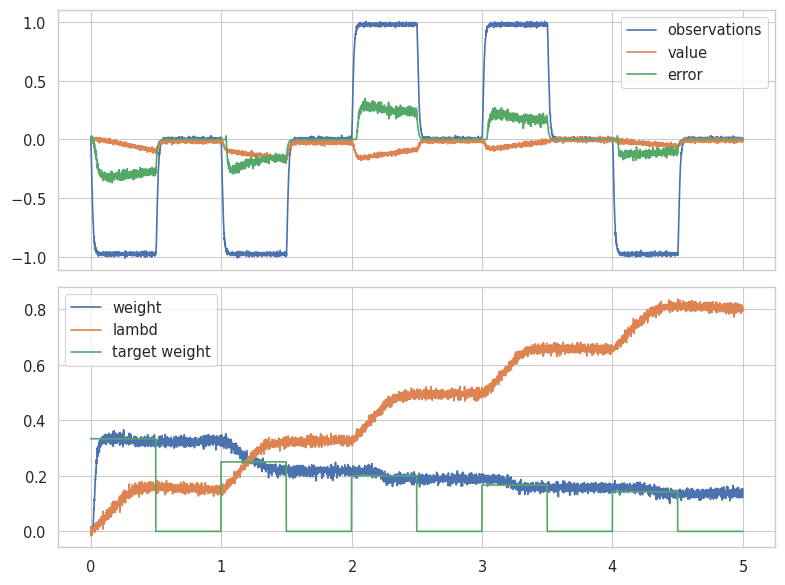

In [3]:
times = sim.trange().flatten()
stim = sim.data[net.probe_stim].flatten()
weight = sim.data[net.probe_weight].flatten()
memory = sim.data[net.probe_memory].flatten()
error = sim.data[net.probe_error_value].flatten()
value = sim.data[net.probe_value].flatten()
weight_target = sim.data[net.probe_target].flatten()
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6), sharex=True)
    sns.lineplot(x=times, y=stim, ax=axes[0], label='observations')
    sns.lineplot(x=times, y=value, ax=axes[0], label='value')
    sns.lineplot(x=times, y=error, ax=axes[0], label='error')
    sns.lineplot(x=times, y=weight, ax=axes[1], label='weight')
    sns.lineplot(x=times, y=memory, ax=axes[1], label='lambd')
    sns.lineplot(x=times, y=weight_target, ax=axes[1], label='target weight')
    plt.tight_layout()

In [ ]:
times = sim.trange().flatten()
input_obs = sim.data[net.probe_input_obs].flatten()
obs = sim.data[net.probe_obs].flatten()
weight = sim.data[net.probe_weight].flatten()
error = sim.data[net.probe_error].flatten()
value = sim.data[net.probe_value].flatten()
context = sim.data[net.probe_context]
obs_times = np.arange(0, 6*env.T, env.T)

obs_spikes = sim.data[net.probe_obs_spikes]
weight_spikes = sim.data[net.probe_weight_spikes]
error_spikes = np.hstack([sim.data[net.probe_error1_spikes], sim.data[net.probe_error2_spikes]])
value_spikes = sim.data[net.probe_value_spikes]
context_spikes = sim.data[net.probe_context_spikes]
times2, obs_spikes2 = preprocess_spikes(times, obs_spikes, num=100, sample_size=100)
times2, weight_spikes2 = preprocess_spikes(times, weight_spikes, num=100, sample_size=100)
times2, error_spikes2 = preprocess_spikes(times, error_spikes, num=100, sample_size=100)
times2, value_spikes2 = preprocess_spikes(times, value_spikes, num=100, sample_size=100)
times2, context_spikes2 = preprocess_spikes(times, context_spikes, num=100, sample_size=100)

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(9,4), sharex=True, sharey='row')
    sns.lineplot(x=times, y=obs, ax=axes[0][0], color=palette[1])
    sns.lineplot(x=times, y=error, ax=axes[0][1], color=palette[2])
    sns.lineplot(x=times, y=weight, ax=axes[0][2], color=palette[4])
    for d in range(context.shape[1]):
        sns.lineplot(x=times, y=context[:,d], ax=axes[0][3], color=palette[d], alpha=0.5)
    sns.lineplot(x=times, y=value, ax=axes[0][4], color=palette[0])
    # sns.lineplot(x=obs_times, y=B_0, ax=axes[0][3], label='Bayes_0')
    sns.lineplot(x=obs_times, y=RL_0, ax=axes[0][4], color=palette[3])
    axes[0][0].set(title='observation', xlim=[0,5], ylim=[-1,1], xticks=range(6), ylabel='Decoded Estimate')
    axes[0][1].set(title='error')
    axes[0][2].set(title='weight')
    axes[0][3].set(title='context')
    axes[0][4].set(title='value')
with sns.axes_style("white"):
    # plot_spikes(times, obs_spikes, ax=axes[1][0])
    # plot_spikes(times, error_spikes, ax=axes[1][1])
    # plot_spikes(times, weight_spikes, ax=axes[1][2])
    # plot_spikes(times, value_spikes, ax=axes[1][3])
    plot_spikes(times2, obs_spikes2, ax=axes[1][0])
    plot_spikes(times2, error_spikes2, ax=axes[1][1])
    plot_spikes(times2, weight_spikes2, ax=axes[1][2])
    plot_spikes(times2, context_spikes2, ax=axes[1][3])
    plot_spikes(times2, value_spikes2, ax=axes[1][4])
    axes[1][0].grid(False)
    axes[1][1].grid(False)
    axes[1][2].grid(False)
    axes[1][3].grid(False)
    axes[1][4].grid(False)
    axes[1][0].set(ylabel='Neuron')
# axes[1].set(xlabel='time', ylabel='weight', xticks=obs_times)
plt.tight_layout()
fig.savefig("plots/dynamics_NEF_RL_demo.jpg", dpi=200)

### Jiang

In [4]:
trial = 1
sid = 1
z = 0.5
alpha = 0.0004
lambd = 0.5
n_neurons = 200
dataset = 'jiang'

empirical = pd.read_pickle(f"data/{dataset}.pkl").query("sid==@sid")
trials = empirical['trial'].unique() 
W = np.zeros((1, n_neurons))
for t in trials[:20]:
    print(f"training sid {sid}, trial {t}")
    env = EnvironmentCount(dataset, sid=sid, trial=t, lambd=lambd, iti_noise=0)
    net, sim, W = simulate_NEF_syn(W, env, alpha=alpha, n_neurons=n_neurons, z=z, seed_net=sid, train=True)
print(f"running sid {sid}, trial {trial}")
env = EnvironmentCount(dataset, sid=sid, trial=trial, lambd=lambd, iti_noise=0)
net, sim = simulate_NEF_syn(W, env, alpha=alpha, n_neurons=n_neurons, z=z, seed_net=sid, train=False)
obs_times = env.obs_times

training sid 1, trial 1
training sid 1, trial 2
training sid 1, trial 3
training sid 1, trial 4
training sid 1, trial 5
training sid 1, trial 6
training sid 1, trial 7
training sid 1, trial 8
training sid 1, trial 9
training sid 1, trial 10
training sid 1, trial 11
training sid 1, trial 12
training sid 1, trial 13
training sid 1, trial 14
training sid 1, trial 15
training sid 1, trial 16
training sid 1, trial 17
training sid 1, trial 18
training sid 1, trial 19
training sid 1, trial 20
running sid 1, trial 1


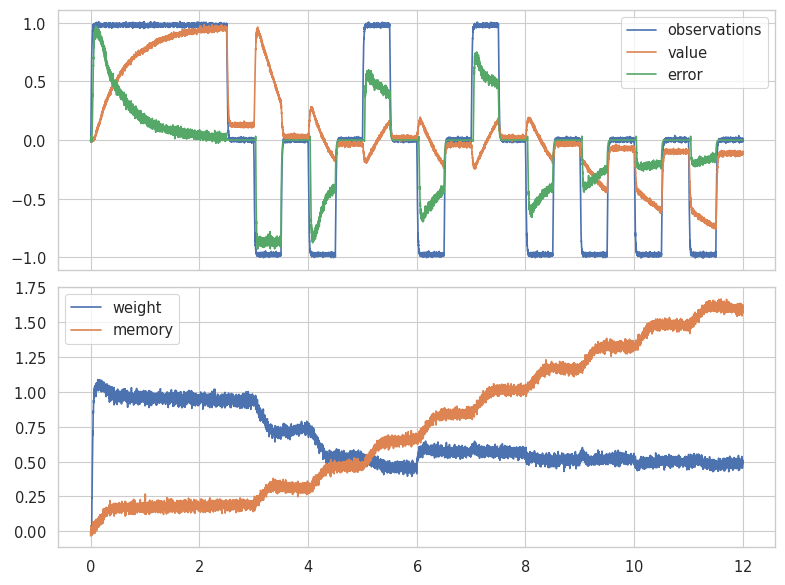

In [5]:
times = sim.trange().flatten()
stim = sim.data[net.probe_stim].flatten()
weight = sim.data[net.probe_weight].flatten()
memory = sim.data[net.probe_memory].flatten()
error = sim.data[net.probe_error_value].flatten()
value = sim.data[net.probe_value].flatten()
# obs_times = np.arange(0, 6*env.T, env.T)

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6), sharex=True)
    sns.lineplot(x=times, y=stim, ax=axes[0], label='observations')
    sns.lineplot(x=times, y=value, ax=axes[0], label='value')
    sns.lineplot(x=times, y=error, ax=axes[0], label='error')
    # sns.lineplot(x=obs_times, y=B_0, ax=axes[0], label='Bayes_0')
    # sns.lineplot(x=obs_times, y=RL_0, ax=axes[0], label='RL_0')
    sns.lineplot(x=times, y=weight, ax=axes[1], label='weight')
    sns.lineplot(x=times, y=memory, ax=axes[1], label='memory')
    # axes[0].set(xlabel='time', ylabel='value')
    # axes[1].set(xlabel='time', ylabel='weight', xticks=obs_times)
    plt.tight_layout()

In [ ]:
times = sim.trange().flatten()
input_obs = sim.data[net.probe_input_obs].flatten()
obs = sim.data[net.probe_obs].flatten()
weight = sim.data[net.probe_weight].flatten()
error = sim.data[net.probe_error].flatten()
value = sim.data[net.probe_value].flatten()
obs_times = np.arange(3*env.T, env.T+4*env.n_neighbors*env.T, env.T)
obs_times = list(obs_times)
obs_times.insert(0, 0)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6), sharex=True)
sns.lineplot(x=times, y=obs, ax=axes[0], label='observations')
sns.lineplot(x=times, y=value, ax=axes[0], label='value')
sns.lineplot(x=times, y=error, ax=axes[0], label='error')
sns.lineplot(x=obs_times, y=RLz, ax=axes[0], label='RLz')
sns.lineplot(x=obs_times, y=DGz, ax=axes[0], label='DGz')
sns.lineplot(x=times, y=weight, ax=axes[1], label='weight')
axes[1].axhline(0, color='k', lw=0.1)
axes[1].axvline(3*env.T, color='k', ls='--')
axes[1].axvline(3*env.T+env.n_neighbors*env.T, color='k', ls='--')
axes[1].axvline(3*env.T+2*env.n_neighbors*env.T, color='k', ls='--')
axes[1].axvline(3*env.T+3*env.n_neighbors*env.T, color='k', ls='--')
axes[0].set(xlabel='time', ylabel='value')
axes[1].set(xlabel='time', ylabel='value', xticks=np.arange(0, env.T+4*env.n_neighbors*env.T, env.T))  # , ylim=(0.0, 0.5)
plt.tight_layout()

# Yoo

training sid 1, trial 1


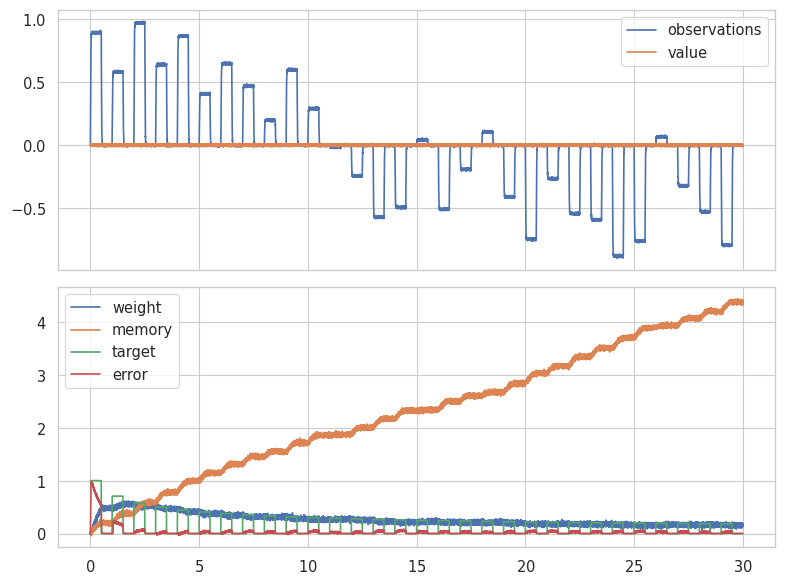

training sid 1, trial 2


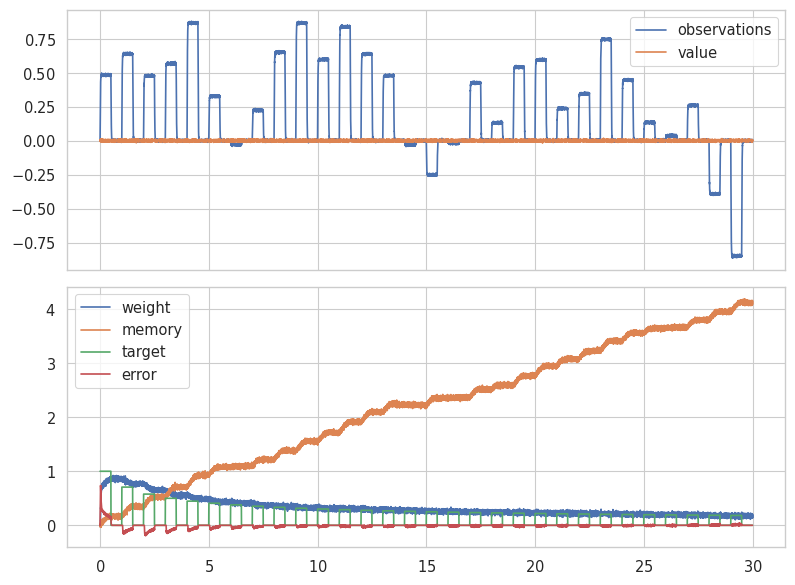

training sid 1, trial 3


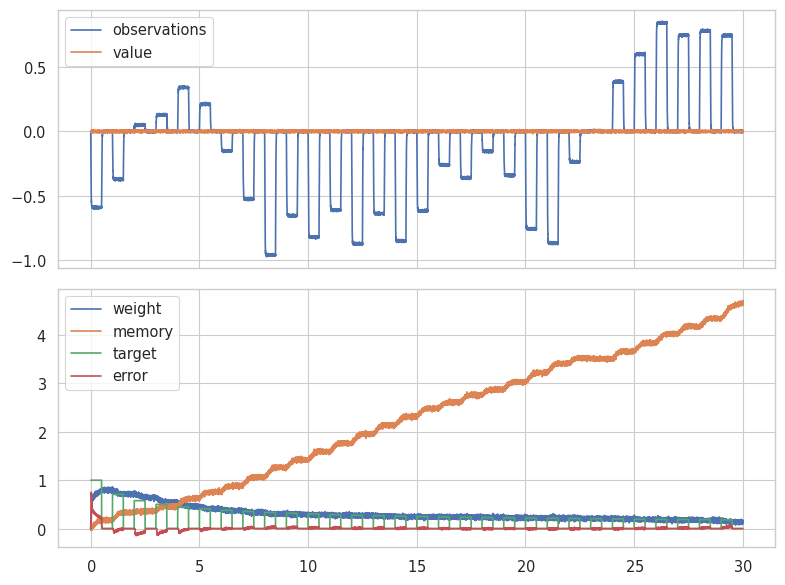

training sid 1, trial 4


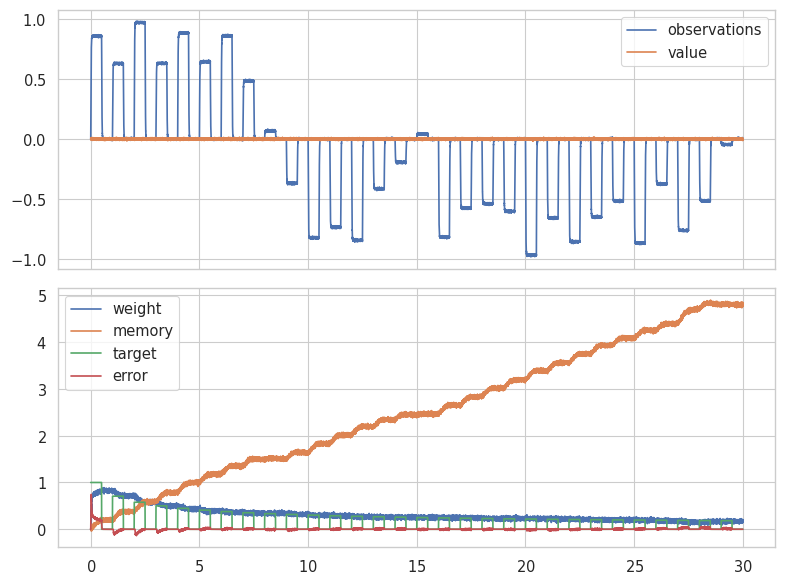

training sid 1, trial 5


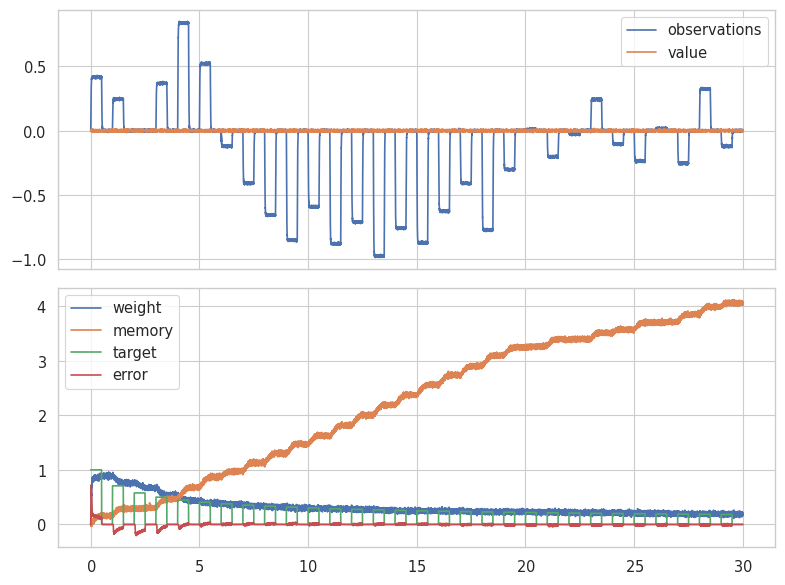

training sid 1, trial 6


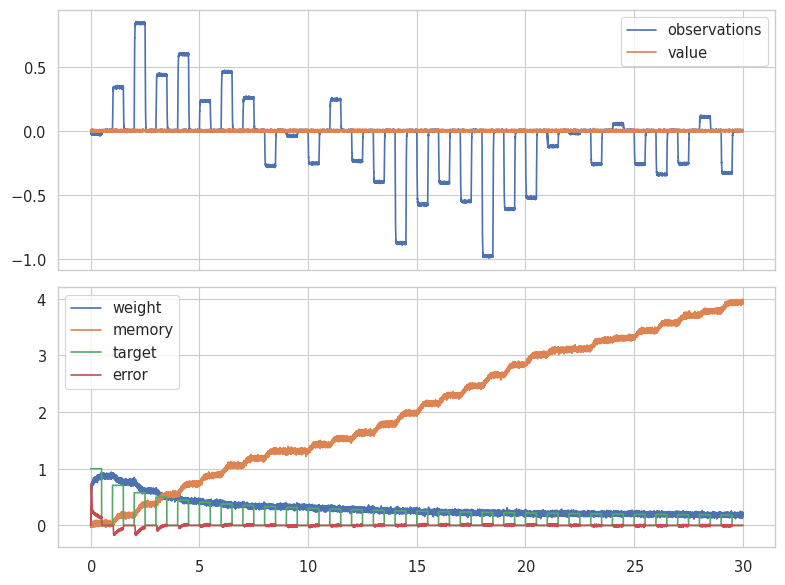

training sid 1, trial 7


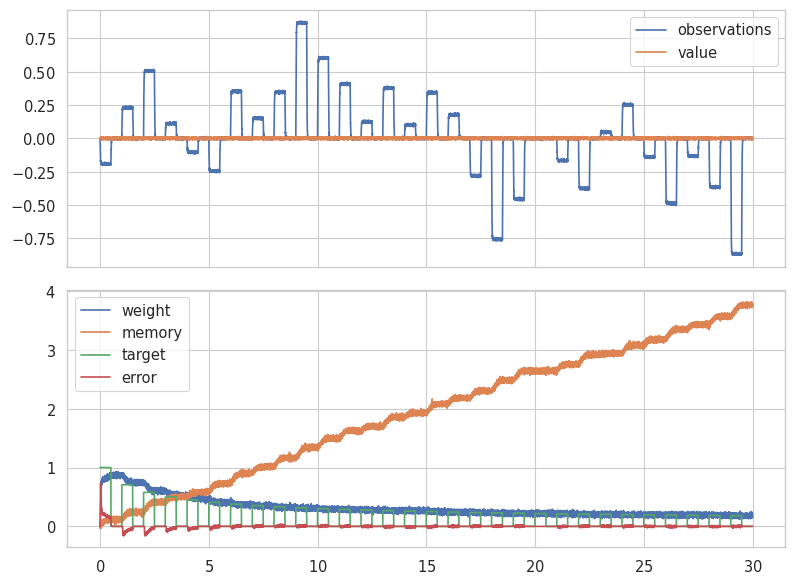

training sid 1, trial 8


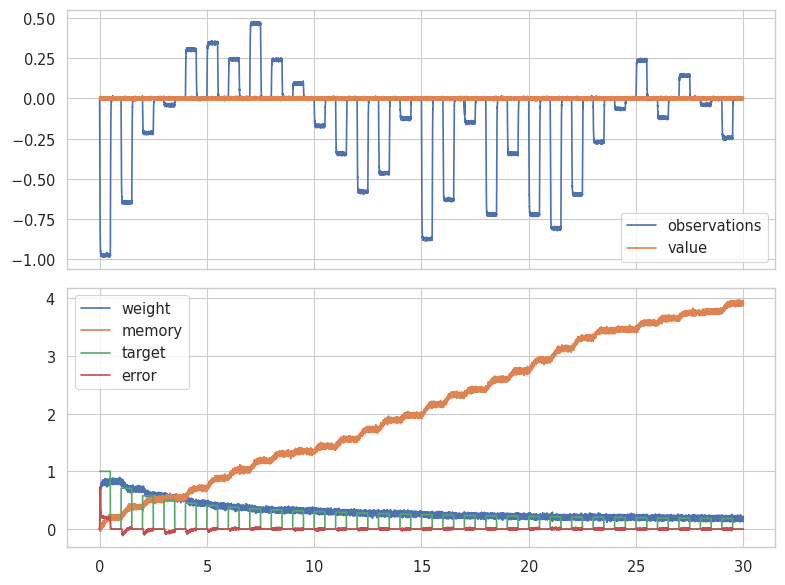

training sid 1, trial 9


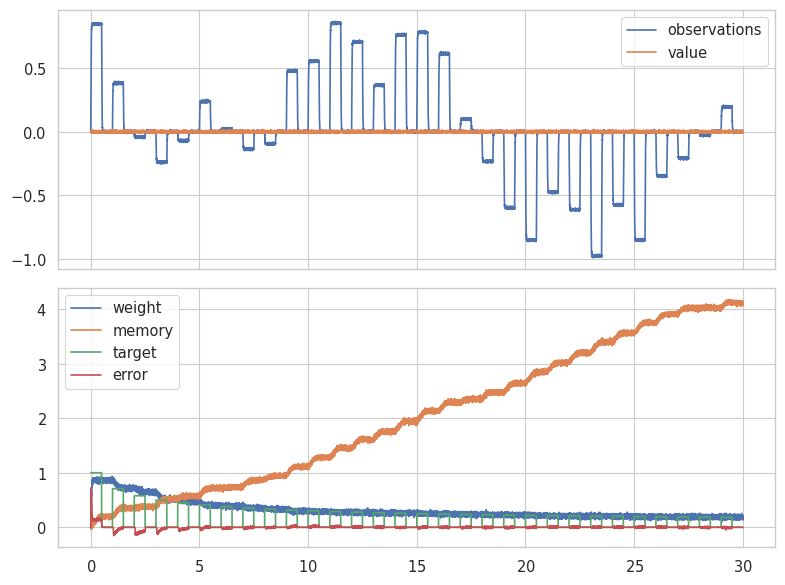

training sid 1, trial 10


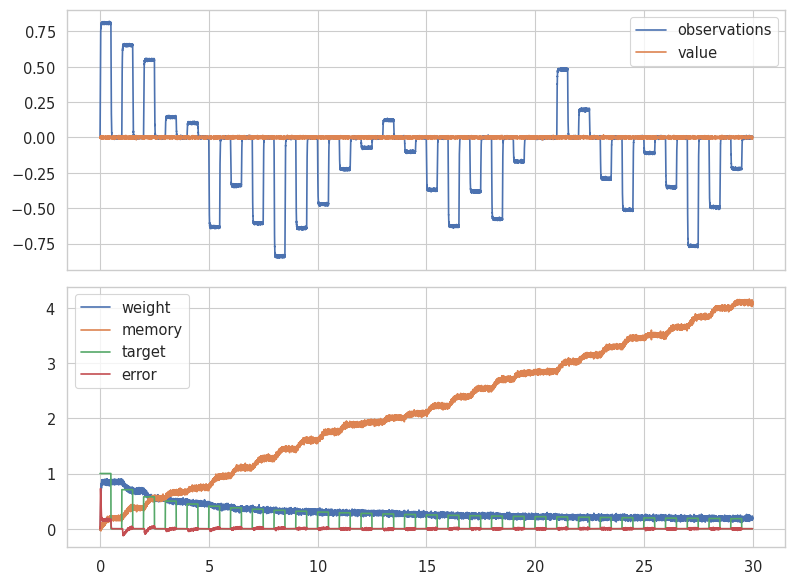

training sid 1, trial 11


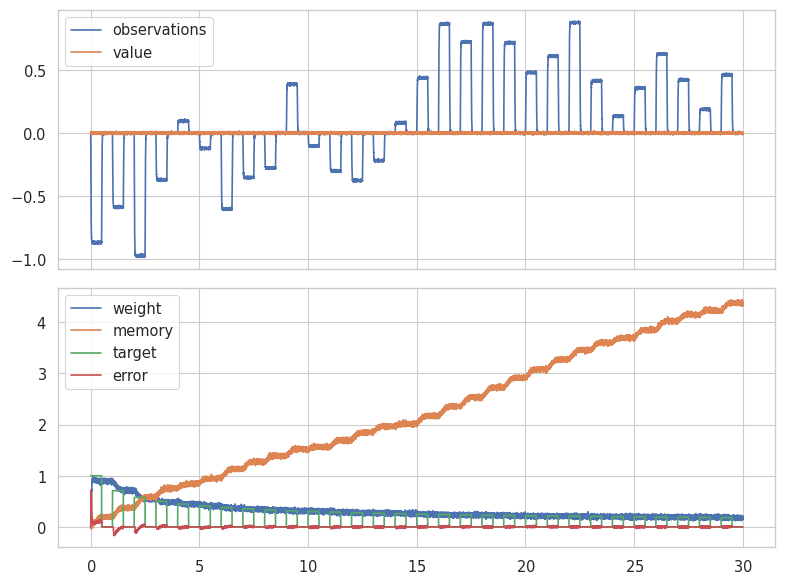

training sid 1, trial 12


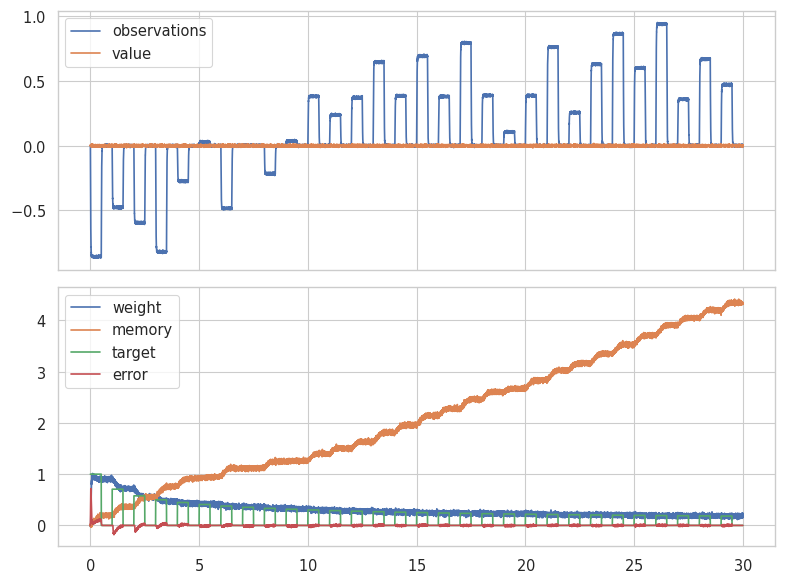

training sid 1, trial 13


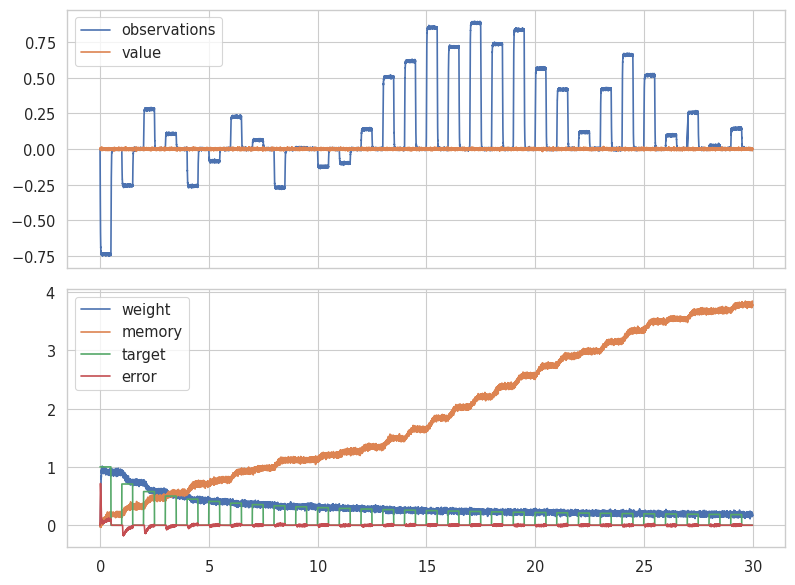

training sid 1, trial 14


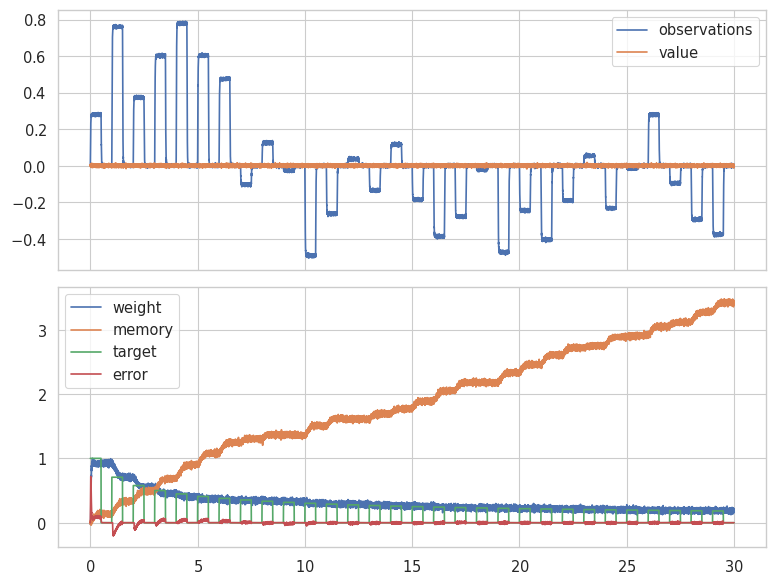

training sid 1, trial 15


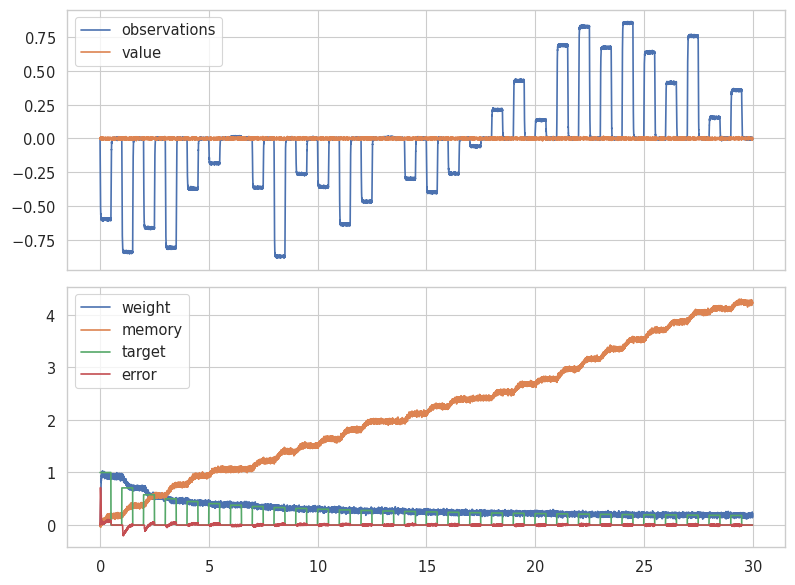

training sid 1, trial 16


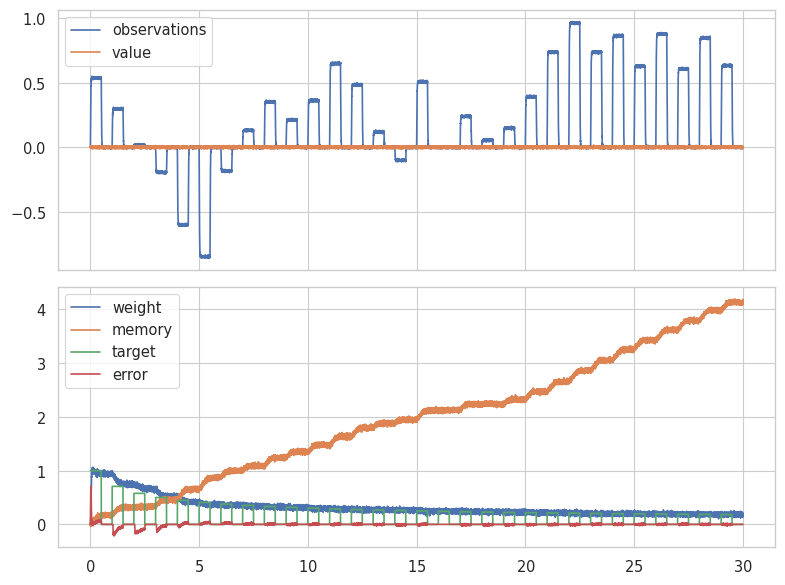

training sid 1, trial 17


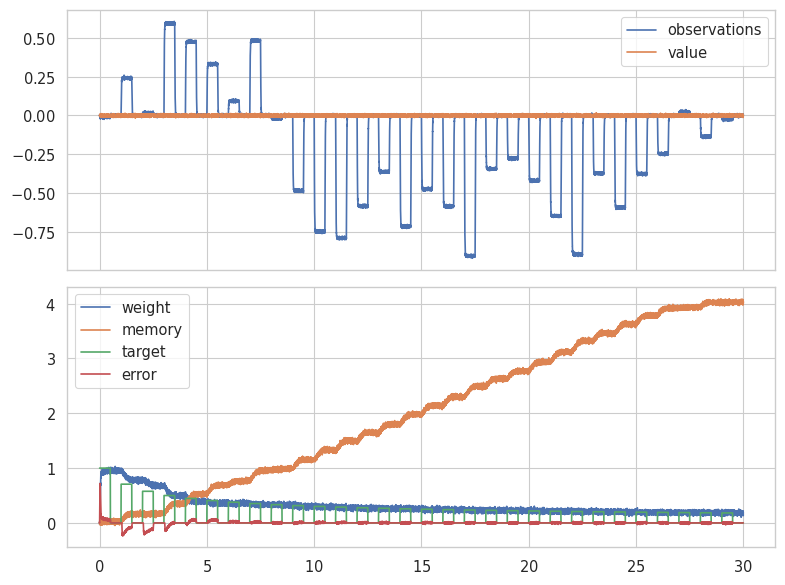

training sid 1, trial 18


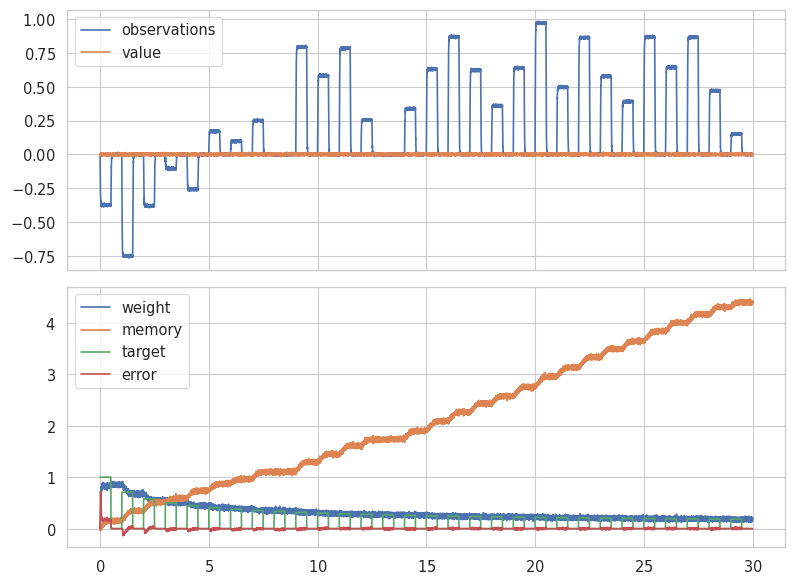

training sid 1, trial 19


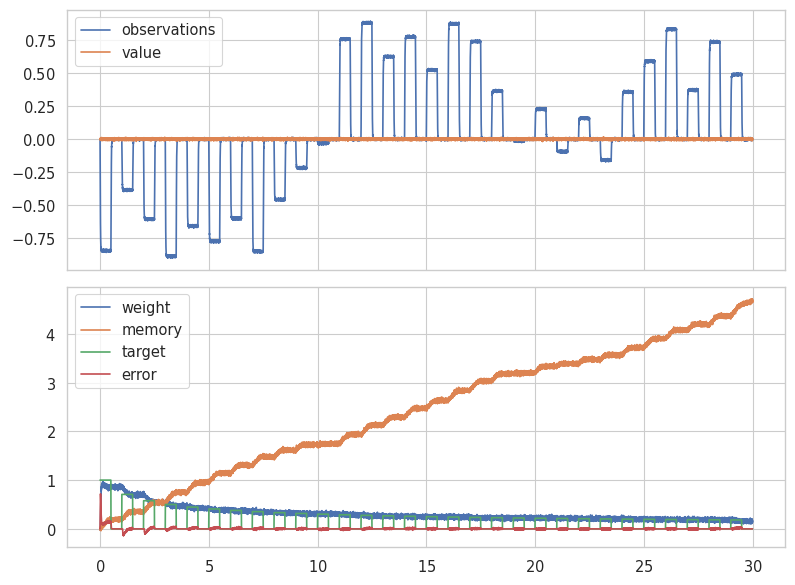

training sid 1, trial 20


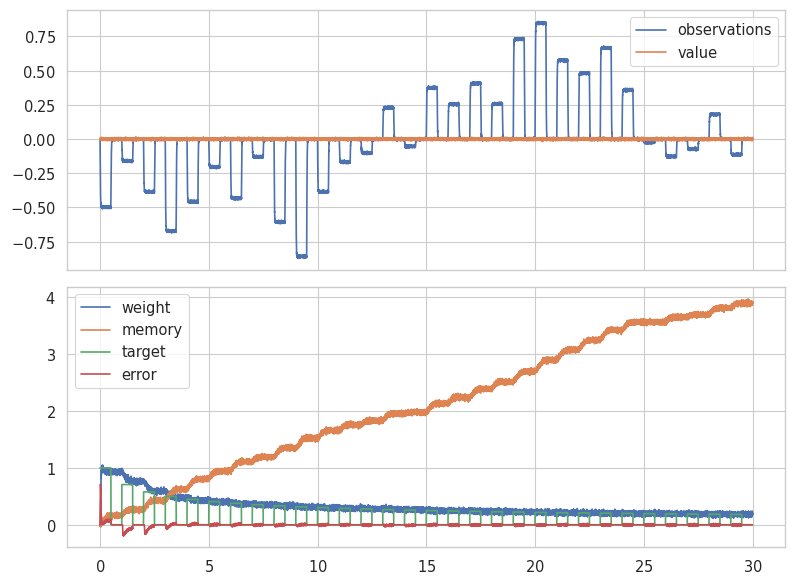

running sid 1, trial 2


In [8]:
trial = 2
sid = 1
alpha = 2e-4
lambd = 0.5
z = 0
n_neurons = 1000
dataset = 'yoo'

empirical = pd.read_pickle(f"data/{dataset}.pkl").query("sid==@sid")
trials = empirical['trial'].unique() 
W = np.zeros((1, n_neurons))
for t in trials[:20]:
    print(f"training sid {sid}, trial {t}")
    env = EnvironmentCount(dataset, sid=sid, trial=t, lambd=lambd)
    net, sim, W = simulate_NEF_syn(W, env, alpha=alpha, n_neurons=n_neurons, z=z, seed_net=sid, train=True)
    times = sim.trange().flatten()
    stim = sim.data[net.probe_stim].flatten()
    weight = sim.data[net.probe_weight].flatten()
    memory = sim.data[net.probe_memory].flatten()
    error = sim.data[net.probe_error_weight].flatten()
    target = sim.data[net.probe_target].flatten()
    value = sim.data[net.probe_value].flatten()
    with sns.axes_style("whitegrid"):
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6), sharex=True)
        sns.lineplot(x=times, y=stim, ax=axes[0], label='observations')
        sns.lineplot(x=times, y=value, ax=axes[0], label='value')
        # sns.lineplot(x=times, y=error, ax=axes[0], label='error')
        sns.lineplot(x=times, y=weight, ax=axes[1], label='weight')
        sns.lineplot(x=times, y=memory, ax=axes[1], label='memory')
        sns.lineplot(x=times, y=target, ax=axes[1], label='target')
        sns.lineplot(x=times, y=error, ax=axes[1], label='error')
        plt.tight_layout()
        plt.show()
        plt.close('all')
print(f"running sid {sid}, trial {trial}")
env = EnvironmentCount(dataset, sid=sid, trial=trial, lambd=lambd)
net, sim = simulate_NEF_syn(W, env, alpha=alpha, n_neurons=n_neurons, z=z, seed_net=sid, train=False)

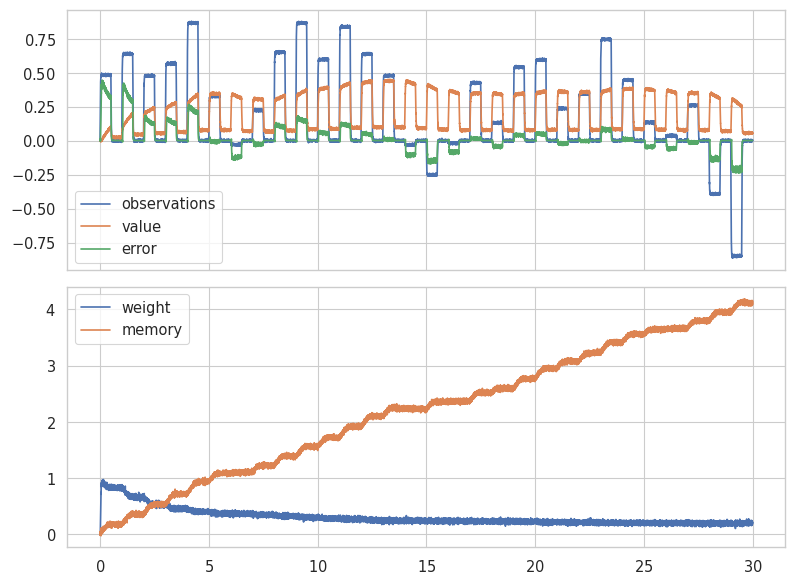

In [9]:
times = sim.trange().flatten()
stim = sim.data[net.probe_stim].flatten()
weight = sim.data[net.probe_weight].flatten()
memory = sim.data[net.probe_memory].flatten()
error = sim.data[net.probe_error_value].flatten()
value = sim.data[net.probe_value].flatten()
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6), sharex=True)
    sns.lineplot(x=times, y=stim, ax=axes[0], label='observations')
    sns.lineplot(x=times, y=value, ax=axes[0], label='value')
    sns.lineplot(x=times, y=error, ax=axes[0], label='error')
    sns.lineplot(x=times, y=weight, ax=axes[1], label='weight')
    sns.lineplot(x=times, y=memory, ax=axes[1], label='memory')
    plt.tight_layout()